In [2]:
from eunjeon import Mecab
from gensim.models import Word2Vec, FastText
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from PIL import Image

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
상폐기업뉴스 = pd.read_csv('../../Step3_1_뉴스전처리/전처리후/상폐기업뉴스전처리.csv')
상폐기업뉴스추가 = pd.read_csv('../../Step3_1_뉴스전처리/전처리후/상폐기업뉴스전처리추가.csv')
상폐기업뉴스 = pd.concat([상폐기업뉴스, 상폐기업뉴스추가])
상폐기업뉴스.reset_index(inplace=True, drop=True)

정상기업뉴스 = pd.read_csv('../../Step3_1_뉴스전처리/전처리후/정상기업뉴스전처리.csv', encoding='cp949')
정상기업뉴스추가 = pd.read_csv('../../Step3_1_뉴스전처리/전처리후/정상기업뉴스전처리추가.csv')
정상기업뉴스 = pd.concat([정상기업뉴스, 정상기업뉴스추가])
정상기업뉴스.reset_index(inplace=True, drop=True)

뉴스 = pd.concat([정상기업뉴스, 상폐기업뉴스])
뉴스.reset_index(drop=True, inplace=True)

In [15]:
mecab = Mecab()
# Mecab으로 명사만 추출
상폐기업뉴스['뉴스기사본문전처리'] = 상폐기업뉴스['뉴스기사본문전처리'].apply(lambda x: mecab.nouns(x))
# 한 글자 단어 제거
상폐기업뉴스['뉴스기사본문전처리'] = 상폐기업뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if len(word) > 1])

In [19]:
mecab = Mecab()
# Mecab으로 명사만 추출
정상기업뉴스['뉴스기사본문전처리'] = 정상기업뉴스['뉴스기사본문전처리'].apply(lambda x: mecab.nouns(x))
# 한 글자 단어 제거
정상기업뉴스['뉴스기사본문전처리'] = 정상기업뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if len(word) > 1])

,기업,기사발행일,기사제목,뉴스기사본문전처리
0,씨제이이엔엠,2011.12.13. 오전 8:24,"씨제이이엔엠, 유형자산 취득 후 처분 예정","[씨제이, 규모, 유형, 자산, 취득, 공시, 판교, 도시, 특별, 계획, 구역, ..."
1,씨제이이엔엠,2011.11.17. 오전 8:47,시초가 소폭 하락 예상 - 코스닥 동시호가,"[코스닥, 시장, 소폭, 하락, 출발, 예상, 코스닥, 시장, 시가총액, 상위, 종..."
2,안랩,2011.12.06. 오전 10:35,"안랩, `V3ㆍ네트워크 보안장비 연동` 특허 획득","[안철수연구소, 네트워크, 통합, 보안, 장비, 트러스, 가드, 적용, 기술, 단말..."
3,안랩,2011.10.10. 오후 3:03,"한컴과 안랩, 10월은 특별한 달","[국내, 대표, 소프트웨어, 업체, 도약, 선언, 성장세, 업계, 한글, 컴퓨터, ..."
4,포스코아이씨티,2011.08.31. 오전 10:32,"포스코아이씨티, POSCO IT Outsourcing SLA 계약금액 증가","[포스코, 아이, 씨티, 계약, 관련, 계약, 금액, 정정, 공시, 공시, 강재웅,..."
...,...,...,...,...
6877,에이치엘비,2020.09.22. 오후 2:57,"""이래도 불법 공매도가 아니라고?""...에이치엘비 주주들 뿔났다","[에이치엘비, 주주, 공매, 세력, 개월, 주가, 하락, 시세, 조정, 주장, 거래..."
6878,에이치엘비,2020.12.30. 오전 11:16,"리보세라닙 병용 식도암 임상, 방사선 병행시 3명중 1명 `완전관해`","[에이치엘비, 중국, 수행, 병용, 임상, 결과, 위암, 식도암, 통계, 유의미, ..."
6879,에이치엘비,2020.12.14. 오전 9:59,"넥스트사이언스 관계사 나노젠 ""내년 5월 코로나백신 양산 계획""","[넥스트, 사이언스, 관계사, 베트남, 기업, 유일, 코로나, 백신, 임상, 승인,..."
6880,에이치엘비,2020.12.14. 오전 9:28,넥스트사이언스 관계사 나노젠 “코로나 백신 내년 5월 양산 계획”,"[사진, 넥스트, 사이언스, 재조합, 단백질, 조각, 나노, 코박스, 면역, 반응,..."


In [20]:
## 전체뉴스
mecab = Mecab()
# Mecab으로 명사만 추출
뉴스['뉴스기사본문전처리'] = 뉴스['뉴스기사본문전처리'].apply(lambda x: mecab.nouns(x))
# 한 글자 단어 제거
뉴스['뉴스기사본문전처리'] = 뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if len(word) > 1])

,기업,기사발행일,기사제목,뉴스기사본문전처리
0,씨제이이엔엠,2011.12.13. 오전 8:24,"씨제이이엔엠, 유형자산 취득 후 처분 예정","[씨제이, 규모, 유형, 자산, 취득, 공시, 판교, 도시, 특별, 계획, 구역, ..."
1,씨제이이엔엠,2011.11.17. 오전 8:47,시초가 소폭 하락 예상 - 코스닥 동시호가,"[코스닥, 시장, 소폭, 하락, 출발, 예상, 코스닥, 시장, 시가총액, 상위, 종..."
2,안랩,2011.12.06. 오전 10:35,"안랩, `V3ㆍ네트워크 보안장비 연동` 특허 획득","[안철수연구소, 네트워크, 통합, 보안, 장비, 트러스, 가드, 적용, 기술, 단말..."
3,안랩,2011.10.10. 오후 3:03,"한컴과 안랩, 10월은 특별한 달","[국내, 대표, 소프트웨어, 업체, 도약, 선언, 성장세, 업계, 한글, 컴퓨터, ..."
4,포스코아이씨티,2011.08.31. 오전 10:32,"포스코아이씨티, POSCO IT Outsourcing SLA 계약금액 증가","[포스코, 아이, 씨티, 계약, 관련, 계약, 금액, 정정, 공시, 공시, 강재웅,..."
...,...,...,...,...
15371,코썬바이오,2020.01.10. 오후 7:40,"코썬바이오, 불성실공시법인 지정","[한국, 거래소, 코스닥, 시장, 본부, 바이오, 지난해, 최대, 주주, 변경, 수..."
15372,코썬바이오,2019.12.20. 오후 6:53,"거래소, 코썬바이오 불성실 공시법인 지정…23일 주식거래 정지","[한국, 거래소, 코스닥, 시장, 본부, 바이오, 성실, 공시, 법인, 지정, 공시..."
15373,코썬바이오,2019.12.23. 오후 5:17,코썬바이오 불성실 공시법인 지정예고,"[공시, 불이행, 성실, 공시, 법인, 지정, 예고, 공시, 사유, 최대, 주주, ..."
15374,코썬바이오,2019.12.23. 오후 5:23,"거래소, 코썬바이오 불성실 공시법인 지정예고","[한국, 거래소, 코스닥, 시장, 본부, 바이오, 공시, 불이행, 성실, 공시, 법..."


리뷰의 최대 길이 : 2529
리뷰의 평균 길이 : 151.53614315987755


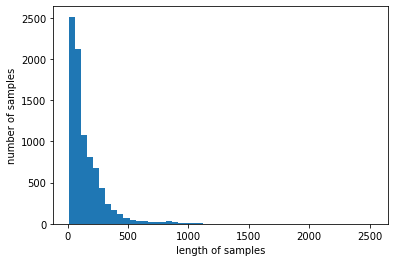

In [21]:
print('리뷰의 최대 길이 :',max(len(review) for review in 상폐기업뉴스['뉴스기사본문전처리']))
print('리뷰의 평균 길이 :',sum(map(len, 상폐기업뉴스['뉴스기사본문전처리']))/len (상폐기업뉴스['뉴스기사본문전처리']))
plt.hist([len(review) for review in 상폐기업뉴스['뉴스기사본문전처리']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### Mecab으로 토큰화하고 Word2Vec로 폐지 유사 단어 도출

In [41]:
# size = 만들어질 워드 벡터의 차원
# window = 단어 앞과 뒤에서 몇개를 볼것인지 정하는 킉
# min_count = 단어 최소 빈도수의 임계치(이 임계치보다 적은 단어는 훈련시키지 않음)
# workers = 학습에 이용하는 프로세스의 갯수
# sg = 0 일 경우 CBOW, 1 일 경우 Skip-gram
model = Word2Vec(sentences=상폐기업뉴스['뉴스기사본문전처리'], window = 5, min_count = 5, workers = 4, sg = 1)
model.wv.vectors.shape

(11364, 100)

In [181]:
# 폐지 유사단어 추출
유사도결과 = pd.DataFrame(model.wv.most_similar(["폐지"], topn=20), columns=['단어', '유사도'])
유사도결과

,단어,유사도
0,상장폐지,0.813961
1,상폐,0.785531
2,적격성,0.743553
3,이의제기,0.734525
4,이의신청,0.723685
5,날로,0.716314
6,재심사,0.714781
7,심판,0.700808
8,웹솔,0.700555
9,폐가,0.697773


In [15]:
## 정상기업 상폐기업 뉴스 합친 후 폐지 유사단어 추출
model = Word2Vec(sentences=뉴스['뉴스기사본문전처리'], window = 5, min_count = 25, workers = 4, sg = 1)
유사도결과 = pd.DataFrame(model.wv.most_similar(["폐지"], topn=20), columns=['단어', '유사도'])
유사도결과

,단어,유사도
0,격성,0.773562
1,상장,0.765573
2,퇴출,0.764932
3,실질,0.720605
4,심사,0.719068
5,속개,0.707785
6,이의,0.673985
7,심의,0.668270
8,거절,0.667534
9,확인서,0.655585


#### Mecab으로 토큰화하고 FastText 폐지 유사 단어 도출

In [184]:
# size = 만들어질 워드 벡터의 차원
# window = 단어 앞과 뒤에서 몇개를 볼것인지 정하는 킉
# min_count = 단어 최소 빈도수의 임계치(이 임계치보다 적은 단어는 훈련시키지 않음)
# workers = 학습에 이용하는 프로세스의 갯수
# sg = 0 일 경우 CBOW, 1 일 경우 Skip-gram
model = FastText(sentences=상폐기업뉴스['뉴스기사본문전처리'], window = 5, min_count = 5, workers = 4, sg = 1)
model.wv.vectors.shape

(10902, 100)

In [185]:
# 폐지 유사단어 추출
유사도결과 = pd.DataFrame(model.wv.most_similar(["폐지"], topn=20), columns=['단어', '유사도'])
유사도결과

,단어,유사도
0,퇴출,0.816898
1,상장,0.801420
2,심사,0.755733
3,격성,0.753467
4,퓨처,0.729641
5,재심사,0.725684
6,실질,0.723862
7,이의,0.723153
8,라컴,0.721449
9,양오,0.714872


In [12]:
## 정상기업 상폐기업 뉴스 합친 후 폐지 유사단어 추출
model = FastText(sentences=뉴스['뉴스기사본문전처리'], window = 5, min_count = 25, workers = 4, sg = 1)
유사도결과 = pd.DataFrame(model.wv.most_similar(["폐지"], topn=20), columns=['단어', '유사도'])
유사도결과

,단어,유사도
0,상장,0.793303
1,퇴출,0.791238
2,심사,0.754463
3,격성,0.745931
4,실질,0.727271
5,거절,0.691061
6,속개,0.690446
7,심의,0.683694
8,이의,0.679556
9,확인서,0.663792


In [113]:
## Embedding Projector 사용 위한 tsv파일 저장

df = pd.DataFrame(model.wv.vectors)
df.to_csv('./wv_model_tsv_mecab.tsv', sep='\t', index=False)
word_df = pd.DataFrame(model.wv.index_to_key)
word_df.to_csv('./wv_word_tsv_mecab.tsv', sep = '\t', index = False)

## 출처 https://blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=222099536934

#### Mecab + Word2Vec & FastText 공통단어로 분류 시 기사수비교

In [22]:
분류단어 = ['폐지', '격성', '퇴출', '실질', '심사', '속개', '이의', '심의', '거절']
분류단어 = '|'.join(분류단어)
분류단어

'폐지|격성|퇴출|실질|심사|속개|이의|심의|거절'

In [23]:
## 정상기업 상폐기업 각각 부도기사 비율 추출
## 분류단어에 있는 단어가 1개라도 있을 경우 1
라벨 = 정상기업뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if word in 분류단어])
라벨 = 라벨.apply(lambda x: 1 if (len(x)>=1) else 0)
정상기업뉴스['긍정부정기사분류'] = 라벨
정상기업부도기사비율 = len(정상기업뉴스[정상기업뉴스['긍정부정기사분류']==1]) / len(정상기업뉴스)

라벨 = 상폐기업뉴스['뉴스기사본문전처리'].apply(lambda x: [word for word in x if word in 분류단어])
라벨 = 라벨.apply(lambda x: 1 if (len(x)>=1) else 0)
상폐기업뉴스['긍정부정기사분류'] = 라벨
상폐기업부도기사비율 = len(상폐기업뉴스[상폐기업뉴스['긍정부정기사분류']==1]) / len(상폐기업뉴스)
print(정상기업부도기사비율, 상폐기업부도기사비율)

0.06684103458297007 0.20838238756769484


In [25]:
## 정상기업 상폐기업 각각 부도기사 수
len(정상기업뉴스[정상기업뉴스['긍정부정기사분류']==1]), len(상폐기업뉴스[상폐기업뉴스['긍정부정기사분류']==1])

(460, 1770)

In [24]:
정상상폐기업간부도기사비율 = (len(정상기업뉴스[정상기업뉴스['긍정부정기사분류']==1]) + len(상폐기업뉴스[상폐기업뉴스['긍정부정기사분류']==1])) / (len(정상기업뉴스)+len(상폐기업뉴스))
정상상폐기업간부도기사비율

0.1450312174817898